In [55]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

airline_df = pd.read_csv('../src/Data/airline_recoded.csv')

X = airline_df.drop(columns=['satisfaction'])
y = airline_df['satisfaction']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



In [82]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2

# Crear el modelo
model = Sequential()

# Añadir capas
model.add(Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],),  kernel_regularizer=l2(0.0001)))
model.add(Dense(32, activation='relu', kernel_regularizer=l2(0.0001)))
model.add(Dropout(0.2))
model.add(Dense(16, activation='relu', kernel_regularizer=l2(0.0001)))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))  # Clasificación binaria

adam = Adam(learning_rate=0.000098) #0.000098

# Compilar el modelo
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Mostrar el resumen del modelo
model.summary()

Model: "sequential_23"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_72 (Dense)                │ (None, 64)             │         1,472 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_73 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_21 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_74 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_22 (Dropout)            │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_75 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,097 (16.00 KB)

 Trainable params: 4,097 (16.00 KB)

 Non-trainable params: 0 (0.00 B)

In [83]:
history = model.fit(X_train, y_train, epochs=100, validation_split = 0.2)

loss_and_metrics = model.evaluate(X_test_scaled, y_test)
print(loss_and_metrics)
print('Loss = ',loss_and_metrics[0])
print('Accuracy = ',loss_and_metrics[1])

Epoch 1/100
1819/1819 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.8714 - loss: 0.3254 - val_accuracy: 0.9379 - val_loss: 0.1683
Epoch 2/100
1819/1819 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9325 - loss: 0.1807 - val_accuracy: 0.9449 - val_loss: 0.1470
Epoch 3/100
1819/1819 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9416 - loss: 0.1536 - val_accuracy: 0.9491 - val_loss: 0.1335
Epoch 4/100
1819/1819 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9466 - loss: 0.1410 - val_accuracy: 0.9549 - val_loss: 0.1246
Epoch 5/100
1819/1819 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9496 - loss: 0.1328 - val_accuracy: 0.9547 - val_loss: 0.1216
Epoch 6/100
1819/1819 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9538 - loss: 0.1266 - val_accuracy: 0.9565 - val_loss: 0.1188
Epoch 7/100
1819/1819 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9526 - loss: 0.1251 - val_accuracy: 0.9586 - val_loss: 0.1121
Epoch 8/100
1819/1819 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9554 - loss: 0

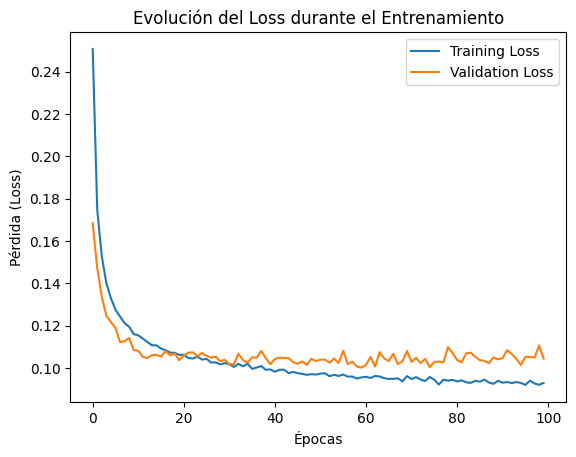

In [84]:
import matplotlib.pyplot as plt

# Graficar la evolución del loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')  # Si se usa validación
plt.title('Evolución del Loss durante el Entrenamiento')
plt.xlabel('Épocas')
plt.ylabel('Pérdida (Loss)')
plt.legend()
plt.show()

975/975 ━━━━━━━━━━━━━━━━━━━━ 1s 687us/step
              precision    recall  f1-score   support

           0       0.95      0.98      0.97     17555
           1       0.98      0.94      0.96     13617

    accuracy                           0.96     31172
   macro avg       0.96      0.96      0.96     31172
weighted avg       0.96      0.96      0.96     31172

Precisión del modelo: 0.9616643141280636


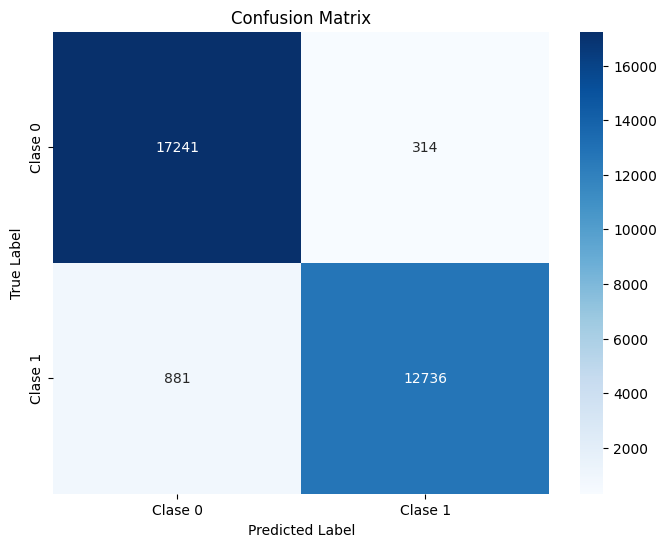

In [86]:
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred_prob = model.predict(X_test_scaled)
y_pred = (y_pred_prob > 0.5).astype("int32")

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(classification_report(y_test, y_pred))

plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Clase 0", "Clase 1"], yticklabels=["Clase 0", "Clase 1"])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')


print(f"Precisión del modelo: {accuracy}")
plt.show()